# Plan

Suposiciones: 
- Vamos a implementar esta solución a GCP
- El proceso de extracción es finito y no dura más de 9 min
- El proceso es ejecutado con una frecuencia fija

Vamos considerar la suposiones para la arquitectur propuesta

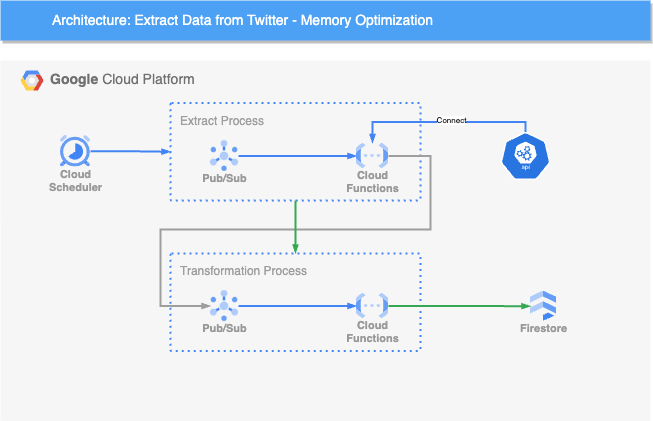

*Nota: si no se puede ver el archivo es challenge-memory-optimization.png*

En el proceso de extraccion consideramos un set de datos pequeños que se puede procesar en menos de 9 minutos, si no planteamos un proceso que va estar siempre encendido o que dura más de 9 min podemos considerar otro tipo de servicios como DataFlow o un Cloud Engine. Entre estos dos ultimos el más óptimo el Dataflow por la forma como procesa los datos e incluso se pueden realizar las transformacion en el mismo flujo.

Con respecto a la transformacion, los datos ingresaran al Pubsub fila por fila y se encolaran para que se envien de esa forma a la Cloud Function de transformación para que finalmente se almacene en Firestore.

Se escogio esta base de datos porque tenemos una estructura semiestructurada y que nos permitira actualizarla si es necesaria.

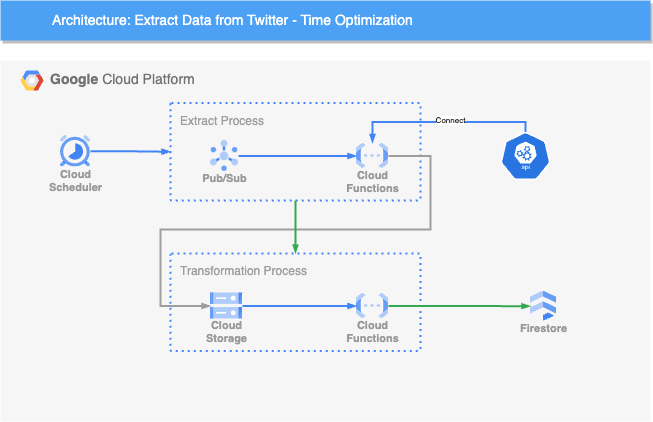

*Nota: si no se puede ver el archivo es challenge-time-optimization.png*

Para esta arquitectura, no tenemos mucho cambio en el proceso de extracción; sin embargo, para el caso que supere las condiciones de poder usar una Cloud Function podemos utilizar el servicio de Dataproc Severless para optimizar procesamiento y costo. Tambien hay que tener en cuenta que debemos de cambiar la logica utilizando PySpark.

Con respecto a la transformacion, vamos a leer todos los datos extraidos de la API en un archivo json. Asi mismo, esta arquitectura inicial se puede optimizar mucho considerando factores reales y pruebas de estres de esta extraccion.

# Desarrollo

## Librerías

La subclase `Counter` del módulo `collections` en Python es una subclase de diccionario utilizada para contar objetos hashables. Es una colección donde los elementos son almacenados como claves de diccionario y sus recuentos respectivos como valores del diccionario.

In [ ]:
import re
import json

from collections import Counter
from typing import List, Tuple

In [ ]:
# Pregunta 3

def q3_time(file_path: str) -> List[Tuple[str, int]]:
    """
    Esta función está diseñada para optimizar el tiempo de ejecución,
    y devuelve los 10 usuarios más mencionados en el conjunto de tweets.
    
    Args:
        file_path: La ruta al archivo que contiene los datos de los tweets.
        
    Returns:
        Una lista de tuplas con el nombre del usuario y el número de menciones,
        ordenada en orden descendente de menciones.
    """
    mentions_count = Counter()
    
    with open(file_path, 'r') as file:
        for line in file:
            tweet = json.loads(line)
            tweet_text = tweet.get('content', '')
            mentions = re.findall(r"@(\w+)", tweet_text)  # Encuentra todas las menciones en el texto del tweet
            mentions_count.update(mentions)  # Actualiza el contador con las menciones encontradas
    
    # Retorna las 10 menciones más comunes
    return mentions_count.most_common(10)

def q3_memory(file_path: str) -> List[Tuple[str, int]]:
    """
    Esta función está diseñada para optimizar la memoria utilizada.
    Calcula los 10 usuarios más mencionados, evitando almacenar toda la lista de menciones en memoria.
    
    Args:
        file_path: La ruta al archivo que contiene los datos de los tweets.
        
    Returns:
        Una lista de tuplas con el nombre del usuario y el número de menciones,
        ordenada en orden descendente de menciones.
    """
    mentions_count = Counter()
    
    with open(file_path, 'r') as file:
        for line in file:
            tweet = json.loads(line)
            tweet_text = tweet.get('content', '')
            mentions = re.findall(r"@(\w+)", tweet_text)  # Encuentra todas las menciones en el texto del tweet
            mentions_count.update(mentions)  # Actualiza el contador con las menciones encontradas
    
    # Calculando el top 10 sin almacenar toda la lista de menciones en memoria
    top_10_mentions = []
    for mention, count in mentions_count.items():
        if len(top_10_mentions) < 10:
            top_10_mentions.append((mention, count))
            top_10_mentions.sort(key=lambda x: x[1], reverse=True)  # Ordena la lista cada vez que se añade un nuevo elemento
        elif count > top_10_mentions[-1][1]:  # Si el conteo de menciones es mayor al último elemento de la lista top 10
            top_10_mentions[-1] = (mention, count)  # Reemplaza el último elemento
            top_10_mentions.sort(key=lambda x: x[1], reverse=True)  # Vuelve a ordenar la lista
            
    return top_10_mentions


# Ejecución

Vamos a definir el path del archivo

In [ ]:
file_path = "farmers-protest-tweets-2021-2-4.json"

Ejecutando optimizando el tiempo

In [ ]:
q3_time(file_path)

Ejecutando optimizando la memoria

In [ ]:
q3_memory(file_path)